<h1 style="font-size: 80px; color: blue"> 
Olivia-finder
</h1>


Olivia Finder is an open source tool for extracting data from software package dependency networks in package managers, designed to be used in conjunction with Olivia.
Olivia Finder uses the web-scraping technique to get updated data, in addition to CSV files as another data source.


**You can find the documentation in:**

<a href="https://dab0012.github.io/olivia-finder">
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="132" height="20" role="img" aria-label="docs: at Github Pages"><title>docs: at Github Pages</title><linearGradient id="s" x2="0" y2="100%"><stop offset="0" stop-color="#bbb" stop-opacity=".1"/><stop offset="1" stop-opacity=".1"/></linearGradient><clipPath id="r"><rect width="132" height="20" rx="3" fill="#fff"/></clipPath><g clip-path="url(#r)"><rect width="35" height="20" fill="#555"/><rect x="35" width="97" height="20" fill="#4c1"/><rect width="132" height="20" fill="url(#s)"/></g><g fill="#fff" text-anchor="middle" font-family="Verdana,Geneva,DejaVu Sans,sans-serif" text-rendering="geometricPrecision" font-size="110"><text aria-hidden="true" x="185" y="150" fill="#010101" fill-opacity=".3" transform="scale(.1)" textLength="250">docs</text><text x="185" y="140" transform="scale(.1)" fill="#fff" textLength="250">docs</text><text aria-hidden="true" x="825" y="150" fill="#010101" fill-opacity=".3" transform="scale(.1)" textLength="870">at Github Pages</text><text x="825" y="140" transform="scale(.1)" fill="#fff" textLength="870">at Github Pages</text></g></svg>
</a>

**Author:**

Daniel Alonso Báscones

In this notebook the functionalities implemented in the library are shown


<p style="color:red"> Warning ⬇ </p>

# **Previous requirements**


<span style="color: red">Setup venv and install requirements</span>

You can install the requirements **locally** or create a **virtual environment** (recommended).

An script <span style="color: lime">activate_venv.sh</span> script is provided in the project root to satisfy this situation


In [ ]:
#!pip install -r ../requirements.txt

If you use a virtual environment, it is necessary to configure it as selected in the Jupyter kernel


<span style="color: red">Setup library path:</span>

- Make sure to run this cell to have the **olivia-finder** library at PATH


In [1]:
import sys
sys.path.append('../')

Load the olivia-finder modules to avoid future import errors

In [2]:
# Utilities submodules
from olivia_finder.utilities.config import Configuration
from olivia_finder.utilities.logger import MyLogger

# MyRequests submodules
from olivia_finder.myrequests.job import RequestJob
from olivia_finder.myrequests.proxy_builder import ProxyBuilder
from olivia_finder.myrequests.proxy_builders.list_builder import ListProxyBuilder
from olivia_finder.myrequests.proxy_builders.ssl_proxies import SSLProxiesBuilder
from olivia_finder.myrequests.proxy_handler import ProxyHandler
from olivia_finder.myrequests.useragent_handler import UserAgentHandler
from olivia_finder.myrequests.request_handler import RequestHandler

# Data Source submodules
from olivia_finder.data_source.csv_ds import CSVDataSource
from olivia_finder.data_source.librariesio_ds import LibrariesioDataSource
from olivia_finder.data_source.repository_scrapers.bioconductor import BioconductorScraper
from olivia_finder.data_source.repository_scrapers.cran import CranScraper
from olivia_finder.data_source.repository_scrapers.npm import NpmScraper
from olivia_finder.data_source.repository_scrapers.pypi import PypiScraper

# Olivia Finder submodules
from olivia_finder.package_manager import PackageManager
from olivia_finder.package import Package

# **Subpackage olivia_finder.utilities**


## Description


**Package structure**

```bash
.
├── config.py
├── exception.py
├── __init__.py
├── logger.py
└── utilities.py
```


In [2]:
!pyreverse -o svg -d . -p utilities ../olivia_finder/utilities --colorized --max-color-depth=6
!sed -i "s/font-family=\"[^\"]*\"/font-family=\"$font\"/g" classes_utilities.svg
!sed -i 's/stroke="[^"]*"/stroke="black"/g' classes_utilities.svg
!mv classes_utilities.svg img/classes_utilities.svg
!rm -r packages_utilities.svg

parsing ../olivia_finder/utilities/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/exception.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/config.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/logger.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/utilities/utilities.py...


<img src="img/classes_utilities.svg">


## Module config


Provides the configuration class, which is used to obtain the configuration variables defined in the .ini configuration file

It is a Singleton instance so only one instance is accessible from any part of the code through the constructor


In [3]:
Configuration().get_key('logger', 'status')

'ENABLED'

## Module logger


The class MyLogger implements a customized logger to register the actions of execution

It is a Singleton instance so only one instance is accessible from any part of the code through the constructor


In [7]:
MyLogger().set_level("DEBUG")

# Log messages
MyLogger().get_logger().debug("Hello World 1")
MyLogger().get_logger().info("Hello World 2")

# disable logger
MyLogger().disable()
MyLogger().get_logger().error("Hello World 3")

# re-enable logger
MyLogger().enable()

MyLogger().get_logger().warning("Hello World 4")
MyLogger().get_logger().error("Hello World 5")
MyLogger().get_logger().critical("Hello World 6")

# reset logger level
MyLogger().set_level(Configuration().get_key('logger', 'level'))

2023-05-03 10:34:25,856 [DEBUG] in 1504849287.<module> (1504849287.py:4)
Hello World 1
2023-05-03 10:34:25,859 [INFO] in 1504849287.<module> (1504849287.py:5)
Hello World 2
2023-05-03 10:34:25,861 [WARNING] in 1504849287.<module> (1504849287.py:14)
Hello World 4
2023-05-03 10:34:25,864 [ERROR] in 1504849287.<module> (1504849287.py:15)
Hello World 5
2023-05-03 10:34:25,865 [CRITICAL] in 1504849287.<module> (1504849287.py:16)
Hello World 6


The console handle shows the different levels using indicative colors

The file handle has the default format


In [5]:
!cat logs/example_log.log

2023-04-25 18:58:06 [DEBUG] Hello World 1 (1008465612.py:7)
2023-04-25 18:58:06 [INFO] Hello World 2 (1008465612.py:8)
2023-04-25 18:58:06 [WARNING] Hello World 4 (1008465612.py:17)
2023-04-25 18:58:06 [ERROR] Hello World 5 (1008465612.py:18)
2023-04-25 18:58:06 [CRITICAL] Hello World 6 (1008465612.py:19)
2023-04-25 19:00:07 [INFO] RequestHandler: Creating RequestHandler object
Number of jobs: 1
Number of workers: 1
Creating jobs queue (request_handler.py:20)
2023-04-25 19:00:07 [INFO] Jobs queue created (request_handler.py:25)
2023-04-25 19:00:07 [INFO] Jobs queue size: 1 (request_handler.py:26)
2023-04-25 19:00:07 [INFO] Creating workers (request_handler.py:35)
2023-04-25 19:00:07 [DEBUG] Starting new HTTPS connection (1): www.sslproxies.org:443 (connectionpool.py:973)
2023-04-25 19:00:07 [DEBUG] https://www.sslproxies.org:443 "GET / HTTP/1.1" 200 None (connectionpool.py:452)
2023-04-25 19:00:08 [DEBUG] Found 100 proxies from SSLProxiesBuilder (proxy_builder.py:75)
2023-04-25 19:00:0

# **Subpackage olivia_finder.myrequests**


### Description


The MyRequest subpackage is designed to obtain data repetitively from a web server

It is able to perform requests with thread parallelism

##### Package structure:

```
├── data
│   └── useragents.txt
├── __init__.py
├── job.py
├── proxy_builder.py
├── proxy_builders
│   ├── __init__.py
│   ├── list_builder.py
│   ├── proxy_builder.py
│   └── ssl_proxies.py
├── proxy_handler.py
├── request_handler.py
├── request_worker.py
└── useragent_handler.py
```

##### Package modules:

- **job**

  It represents a web request work, implements Thread

- **proxy_builder**

  It contains the ProxyBuilder class, used to request proxies from web services

- **proxy_handler**

  It contains the ProxyHandler class, used by the RequestHandler object to obtain a fresh proxy (Singleton)

- **useragent_handler**

  It contains the UserAgentHandler class, used by the RequestHandler object to obtain a fresh user agent (Singleton)

- **request_handler**

  It contains the RequestHandler class, from which we can perform the corresponding works

##### Doc pages

For more information see [MyRequest package doc](https://dab0012.github.io/olivia-finder/olivia_finder/myrequests/myrequests_module.html)


In [ ]:
!pyreverse -o svg -d . -p myrequests ../olivia_finder/myrequests --colorized --max-color-depth=6
!sed -i "s/font-family=\"[^\"]*\"/font-family=\"$font\"/g" classes_myrequests.svg
!sed -i 's/stroke="[^"]*"/stroke="black"/g' classes_myrequests.svg
!mv classes_myrequests.svg img/classes_myrequests.svg
!rm -r packages_myrequests.svg

<img src="img/classes_myrequests.svg">


### Class ProxyBuilder and subclasses


You have the functionality of obtaining a list of internet proxys from some more or less stable data source

ProxyBuilder It is an abstract class and should not be used directly, Its use is made through its subclasses


In [7]:
MyLogger().set_level("DEBUG")

In [8]:
try:
    pb = ProxyBuilder()
except Exception as e:
    print(e)

Can't instantiate abstract class ProxyBuilder with abstract method _parse_request


We can focus on two different ways:

- Obtain the data through Web Scraping from some website that provides updated proxys

- Obtain the data from a proxies list in format `<IP>:<PORT>` from a web server

This is shown below


**_Web scraping implementation (from sslproxies.org)_**


In [9]:
pb_SSLProxies = SSLProxiesBuilder()
pb_SSLProxies.get_proxies()

2023-05-01 17:32:25,773 [DEBUG] in connectionpool._new_conn (connectionpool.py:973)
Starting new HTTPS connection (1): www.sslproxies.org:443
2023-05-01 17:32:33,787 [DEBUG] in connectionpool._make_request (connectionpool.py:452)
https://www.sslproxies.org:443 "GET / HTTP/1.1" 200 None
2023-05-01 17:32:33,856 [DEBUG] in proxy_builder.get_proxies (proxy_builder.py:75)
Found 100 proxies from SSLProxiesBuilder


['35.247.245.218:3129',
 '164.90.253.93:3128',
 '190.61.88.147:8080',
 '152.67.10.190:8100',
 '113.53.231.133:3129',
 '115.144.101.201:10001',
 '207.38.87.110:30114',
 '43.156.100.152:80',
 '198.27.74.6:9300',
 '34.162.144.68:8585',
 '213.83.46.204:3128',
 '20.241.236.196:3128',
 '64.225.8.82:9995',
 '103.118.175.200:3127',
 '194.213.18.81:50098',
 '35.247.198.109:3129',
 '35.247.242.101:3129',
 '35.247.218.71:3129',
 '35.247.223.51:3129',
 '51.159.0.236:3128',
 '35.247.209.139:3129',
 '186.121.235.66:8080',
 '139.99.95.108:8080',
 '35.247.236.135:3129',
 '8.219.97.248:80',
 '87.237.239.95:3128',
 '35.247.247.141:3129',
 '34.94.92.1:8585',
 '158.69.73.79:9300',
 '35.247.237.131:3129',
 '178.151.205.154:45099',
 '35.247.197.18:3129',
 '103.5.109.41:8085',
 '34.118.118.94:8585',
 '34.94.3.209:8585',
 '156.234.201.37:7890',
 '94.130.79.225:24000',
 '200.105.215.22:33630',
 '35.247.239.123:3129',
 '158.160.56.149:8080',
 '61.28.233.217:3128',
 '95.216.196.32:30008',
 '115.144.102.39:10080'

**_Web list implementation (from lists)_**


In [10]:
pb_ListBuilder = ListProxyBuilder(url="https://raw.githubusercontent.com/mertguvencli/http-proxy-list/main/proxy-list/data.txt")
pb_ListBuilder.get_proxies()

2023-05-01 17:32:33,929 [DEBUG] in connectionpool._new_conn (connectionpool.py:973)
Starting new HTTPS connection (1): raw.githubusercontent.com:443
2023-05-01 17:32:34,011 [DEBUG] in connectionpool._make_request (connectionpool.py:452)
https://raw.githubusercontent.com:443 "GET /mertguvencli/http-proxy-list/main/proxy-list/data.txt HTTP/1.1" 200 2398
2023-05-01 17:32:34,014 [DEBUG] in proxy_builder.get_proxies (proxy_builder.py:75)
Found 350 proxies from ListProxyBuilder


['20.241.236.196:3128',
 '3.8.144.154:3128',
 '34.94.3.209:8585',
 '20.99.187.69:8443',
 '35.181.54.72:3128',
 '35.178.115.75:3128',
 '34.174.145.27:8585',
 '116.203.120.106:8080',
 '49.12.219.253:8080',
 '128.140.9.127:8080',
 '167.235.229.11:8080',
 '20.241.236.196:3128',
 '65.109.138.100:8080',
 '35.247.236.135:3129',
 '49.13.1.238:8080',
 '65.21.146.223:8080',
 '35.247.192.123:3129',
 '207.38.87.110:30114',
 '34.174.145.27:8585',
 '49.13.2.254:8080',
 '65.21.244.31:8080',
 '43.156.100.152:80',
 '135.181.198.30:8080',
 '35.247.243.35:3129',
 '135.181.31.43:8080',
 '186.121.235.66:8080',
 '195.201.35.152:8080',
 '35.247.193.135:3129',
 '205.213.80.8:8009',
 '95.216.199.152:8080',
 '35.247.208.170:3129',
 '20.69.79.158:8443',
 '35.247.192.233:3129',
 '77.233.5.68:55443',
 '91.107.216.77:8080',
 '35.247.249.71:3129',
 '113.53.231.133:3129',
 '162.55.218.221:8080',
 '95.216.196.32:30008',
 '8.219.97.248:80',
 '49.12.103.88:8080',
 '35.247.241.32:3129',
 '128.140.3.26:8080',
 '128.140.80

### Class ProxyHandler


In [11]:
ph = ProxyHandler()

2023-05-01 17:32:34,068 [DEBUG] in connectionpool._new_conn (connectionpool.py:973)
Starting new HTTPS connection (1): www.sslproxies.org:443
2023-05-01 17:32:34,312 [DEBUG] in connectionpool._make_request (connectionpool.py:452)
https://www.sslproxies.org:443 "GET / HTTP/1.1" 200 None
2023-05-01 17:32:34,352 [DEBUG] in proxy_builder.get_proxies (proxy_builder.py:75)
Found 100 proxies from SSLProxiesBuilder
2023-05-01 17:32:34,354 [DEBUG] in connectionpool._new_conn (connectionpool.py:973)
Starting new HTTPS connection (1): raw.githubusercontent.com:443
2023-05-01 17:32:34,427 [DEBUG] in connectionpool._make_request (connectionpool.py:452)
https://raw.githubusercontent.com:443 "GET /mertguvencli/http-proxy-list/main/proxy-list/data.txt HTTP/1.1" 200 2398
2023-05-01 17:32:34,429 [DEBUG] in proxy_builder.get_proxies (proxy_builder.py:75)
Found 350 proxies from ListProxyBuilder
2023-05-01 17:32:34,430 [DEBUG] in connectionpool._new_conn (connectionpool.py:973)
Starting new HTTPS connectio

### Class UserAgentHandler


The purpose of this class is to provide a set of useragents to be used by the RequestHandler object with the aim of hiding the original identity of the web request

The class is prepared to load the useragents from a text file contained in the package, and in turn can obtain them from a website dedicated to provide them.

If both options are not available, there will be used the default ones hardcoded in the class


Useragents dataset included on the package MyRequests


In [12]:
!tail ../olivia_finder/myrequests/data/useragents.txt

Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/40.0.2214.91 Safari/537.36
Mozilla/5.0 (iPad; U; CPU OS 5_0 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Version/5.1 Mobile/9A334 Safari/7534.48.3
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.130 Safari/537.36
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) coc_coc_browser/50.0.125 Chrome/44.0.2403.125 Safari/537.36
Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0; SLCC2; .NET CLR 2.0.50727; .NET4.0C; .NET4.0E)
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.124 Safari/537.36
Mozilla/5.0 (Windows NT 6.3; Win64; x64; Trident/7.0; MAARJS; rv:11.0) like Gecko
Mozilla/5.0 (Linux; Android 5.0; SAMSUNG SM-N900T Build/LRX21V) AppleWebKit/537.36 (KHTML, li

The default constructor loads the usragents from the file


In [13]:
ua_handler = UserAgentHandler()
ua_handler.useragents_list[:5]

2023-05-01 17:32:34,729 [INFO] in useragent_handler.__init__ (useragent_handler.py:34)
Useragents loaded from file: /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/data/useragents.txt


['Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/37.0.2062.94 Chrome/37.0.2062.94 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.85 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/600.8.9 (KHTML, like Gecko) Version/8.0.8 Safari/600.8.9']

We can force obtaining the useragents from the Internet with the flag:

```python
use_file=False
```

We can force get useragents from internet <span style="color:red">(As the class is a Singleton instance I can't show it in the notebook)</span>

```python
ua_handler = UserAgentHandler(use_file=False)
ua_handler.useragents_list[:5]

```


Once the class is initialized, it can provide a random useragent to the object RequestHandler to perform the request


In [14]:
useragents = [ua_handler.get_next_useragent() for _ in range(10)]
useragents

2023-05-01 17:32:34,807 [DEBUG] in useragent_handler.get_next_useragent (useragent_handler.py:137)
Next useragent: Mozilla/5.0 (Linux; Android 4.4.2; RCT6773W22 Build/KOT49H) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/30.0.0.0 Safari/537.36
2023-05-01 17:32:34,808 [DEBUG] in useragent_handler.get_next_useragent (useragent_handler.py:137)
Next useragent: Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; MDDCJS; rv:11.0) like Gecko
2023-05-01 17:32:34,809 [DEBUG] in useragent_handler.get_next_useragent (useragent_handler.py:137)
Next useragent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/34.0.1847.116 Chrome/34.0.1847.116 Safari/537.36
2023-05-01 17:32:34,809 [DEBUG] in useragent_handler.get_next_useragent (useragent_handler.py:137)
Next useragent: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36
2023-05-01 17:32:34,810 [DEBUG] in useragent_handler.get_next_useragent (us

['Mozilla/5.0 (Linux; Android 4.4.2; RCT6773W22 Build/KOT49H) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/30.0.0.0 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; MDDCJS; rv:11.0) like Gecko',
 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/34.0.1847.116 Chrome/34.0.1847.116 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.124 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; MDDCJS; rv:11.0) like Gecko',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:40.0) Gecko/20100101 Firefox/40.0.2 Waterfox/40.0.2',
 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET4.0C; .NET4.0E)',
 'Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
 'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KH

### Class RequestHandler


It is the main class of the MyRequest package and makes use of the ProxyHandler and UserAgentHandler classes to obtain the proxies and user agents that will be used in the web requests that is responsible for performing.


The default constructor does not receive parameters, the class will manage to instantize their units and use the default configuration


**Make a request**


In [16]:
job = RequestJob(
    key="networkx",
    url="https://www.pypi.org/project/networkx/"
)

In [17]:
rh = RequestHandler()
finalized_job = rh.do_request(job)

2023-05-01 17:32:35,055 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object
2023-05-01 17:32:35,057 [DEBUG] in request_handler._setup_job (request_handler.py:84)
Job created
2023-05-01 17:32:35,058 [DEBUG] in request_handler.do_request (request_handler.py:161)
Starting worker 0
2023-05-01 17:32:35,058 [INFO] in request_handler.do_request (request_handler.py:163)
Starting request for networkx: https://www.pypi.org/project/networkx/
2023-05-01 17:32:35,059 [DEBUG] in request_worker.run (request_worker.py:75)
Worker 0: Got job from queue
Job key: networkx
url: https://www.pypi.org/project/networkx/
2023-05-01 17:32:35,059 [DEBUG] in request_worker.run (request_worker.py:83)
Worker 0: Obtaining proxy and user agent
2023-05-01 17:32:35,060 [DEBUG] in proxy_handler.get_next_proxy (proxy_handler.py:100)
Getting next proxy
2023-05-01 17:32:35,060 [DEBUG] in useragent_handler.get_next_useragent (useragent_handler.py:137)
Next useragent: Mozilla/5.0 (Windows

As a result we obtain the ResponseJob object but with the data of the response


In [19]:
print(
    f'Key: {finalized_job.key}\n'
    f'URL: {finalized_job.url}\n'
    f'Response: {finalized_job.response}\n'
)

Key: networkx
URL: https://www.pypi.org/project/networkx/
Response: <Response [200]>



**Do parallel requests**


We can make parallel requests through the use of Threads, it is safe to do so since the class is prepared for it


In [8]:
# MyLogger().disable()

In [21]:
# Initialize RequestHandler
from tqdm import tqdm
rh = RequestHandler()

# Initialize RequestJobs
request_jobs = [
    RequestJob(key="networkx", url="https://www.pypi.org/project/networkx/"),
    RequestJob(key="pandas", url="https://www.pypi.org/project/pandas/"),
    RequestJob(key="numpy", url="https://www.pypi.org/project/numpy/"),
    RequestJob(key="matplotlib",
               url="https://www.pypi.org/project/matplotlib/"),
    RequestJob(key="scipy", url="https://www.pypi.org/project/scipy/"),
    RequestJob(key="scikit-learn",
               url="https://www.pypi.org/project/scikit-learn/"),
    RequestJob(key="tensorflow",
               url="https://www.pypi.org/project/tensorflow/"),
    RequestJob(key="keras", url="https://www.pypi.org/project/keras/")
]

# Set number of workers
num_workers = 4

# Initialize progress bar
progress_bar = tqdm(total=len(request_jobs))

finalized_jobs = rh.do_requests(
    request_jobs=request_jobs,
    num_workers=num_workers,
    progress_bar=progress_bar
)

2023-05-01 17:33:00,754 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object
2023-05-01 17:33:00,756 [INFO] in request_handler.do_requests (request_handler.py:105)
Starting requests
2023-05-01 17:33:00,757 [DEBUG] in request_handler.do_requests (request_handler.py:106)
Number of jobs: 8
2023-05-01 17:33:00,758 [DEBUG] in request_handler._setup_jobs (request_handler.py:52)
Jobs queue size: 8
2023-05-01 17:33:00,758 [DEBUG] in request_handler._setup_jobs (request_handler.py:61)
Creating workers
2023-05-01 17:33:00,759 [DEBUG] in request_handler._setup_jobs (request_handler.py:67)
Workers created
2023-05-01 17:33:00,759 [DEBUG] in request_handler._setup_jobs (request_handler.py:68)
Number of workers: 4
2023-05-01 17:33:00,759 [DEBUG] in request_handler.do_requests (request_handler.py:112)
Starting worker 0
2023-05-01 17:33:00,760 [DEBUG] in request_worker.run (request_worker.py:75)
Worker 0: Got job from queue
Job key: networkx
url: https://www.pypi.or

As a result we get a list of ResponseJob objects


In [22]:
for job in finalized_jobs:
    print(f'Key: {job.key}, URL: {job.url}, Response: {job.response}')

Key: networkx, URL: https://www.pypi.org/project/networkx/, Response: <Response [200]>
Key: tensorflow, URL: https://www.pypi.org/project/tensorflow/, Response: <Response [200]>
Key: pandas, URL: https://www.pypi.org/project/pandas/, Response: <Response [200]>
Key: keras, URL: https://www.pypi.org/project/keras/, Response: <Response [200]>
Key: numpy, URL: https://www.pypi.org/project/numpy/, Response: <Response [200]>
Key: scikit-learn, URL: https://www.pypi.org/project/scikit-learn/, Response: <Response [200]>
Key: matplotlib, URL: https://www.pypi.org/project/matplotlib/, Response: <Response [200]>
Key: scipy, URL: https://www.pypi.org/project/scipy/, Response: <Response [200]>


The Job object contains the response to request


In [23]:
print(finalized_jobs[0].response.text[10000:20000])

ss="split-layout split-layout--middle package-description">
    
      <p class="package-description__summary">Python package for creating and manipulating graphs and networks</p>
    
    <div data-html-include="/_includes/edit-project-button/networkx">
    </div>
    </div>
  </div>
</div>

<div data-controller="project-tabs">
  <div class="tabs-container">
    <div class="vertical-tabs">
      <div class="vertical-tabs__tabs">
        <div class="sidebar-section">
          <h3 class="sidebar-section__title">Navigation</h3>
          <nav aria-label="Navigation for networkx">
            <ul class="vertical-tabs__list" role="tablist">
              <li role="tab">
                <a id="description-tab" href="#description" data-project-tabs-target="tab" data-action="project-tabs#onTabClick" class="vertical-tabs__tab vertical-tabs__tab--with-icon vertical-tabs__tab--is-active" aria-selected="true" aria-label="Project description. Focus will be moved to the description.">
            

# **Subpackage olivia_finder.DataSource**


## Description


This package is responsible for providing a base data structure for all the derivated classes whose purpose is the obtaining data from a specific source.

It is composed of several modules:

##### Package structure:

```data_source
├── csv_ds.py
├── data_source.py
├── librariesio_ds.py
├── repository_scrapers
│   ├── bioconductor.py
│   ├── cran.py
│   ├── npm.py
│   ├── pypi.py
│   └── r.py
└── scraper_ds.py
```

##### Package modules:

- **data_source.py**

  Implements the abstract class Datasource, which is the base class of the rest of the implementations

- **csv_ds.py**

  Implement datasource for \*.csv files

- **librariesio_ds.py**

  Implements datasource for the API of Libraries.io

- **scraper_ds.py**

  Implements the abstract class ScraperDataSource, which is the base class of customized implementations for each repository

- **repository_scraper/**

  Inside there are several implementations based on Datasource web Scraping for Cran, Bioconductor, NPM and PyPI

##### Doc pages

For more info see [data_source package docs](https://dab0012.github.io/olivia-finder/olivia_finder/data_source/data_source_module.html)


In [ ]:
!pyreverse -o svg -d . -p data_source ../olivia_finder/data_source --colorized --max-color-depth=6
!sed -i "s/font-family=\"[^\"]*\"/font-family=\"$font\"/g" classes_data_source.svg
!sed -i 's/stroke="[^"]*"/stroke="black"/g' classes_data_source.svg
!mv classes_data_source.svg img/classes_data_source.svg
!rm -r packages_data_source.svg

parsing ../olivia_finder/data_source/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/data_source/data_source.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/data_source/csv_ds.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/data_source/scraper_ds.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/data_source/__init__.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/data_source/librariesio_ds.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/data_source/repository_scrapers/pypi.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/data_source/repository_scrapers/npm.py...
parsing /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/data_source/repository_

<img src="img/classes_data_source.svg">


## Web Scraping-Based implementations


### Constructor


- The default constructor does not receive parameters

- The number of optional parameters depends on the implementation, but as a rule we can define a name and a description (With the purpose of offering information)

- The most relevant parameter is the RequestHandler object, which will use by the webscraping based DataSource to make requests to the website to which it refers


Implementation for CRAN


In [2]:
cran_ds = CranScraper()

2023-05-03 09:21:54,838 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object


Implementation for Bioconductor


Note that in this case an auxiliary datasource has been added, this functionality has been added because in packages there are packages with dependencies to packages of other packages managers


In [3]:
bioconductor_scraper = BioconductorScraper()

2023-05-03 09:21:56,582 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object


Implementation for PyPi


In [4]:
pypi_scraper = PypiScraper()

2023-05-03 09:22:01,203 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object


Implementation for NPM


In [5]:
npm_scraper = NpmScraper()

2023-05-03 09:22:04,335 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object


### Obtain package names


In [28]:
MyLogger().disable_all_loggers()

CRAN package names


In [ ]:
cran_ds.obtain_package_names()[:10]

2023-05-01 13:52:09,150 [INFO] in cran.obtain_package_names (cran.py:145)
Obtained 19437 packages from https://cran.r-project.org/web/packages/available_packages_by_name.html


['A3',
 'AalenJohansen',
 'AATtools',
 'ABACUS',
 'abbreviate',
 'abbyyR',
 'abc',
 'abc.data',
 'ABC.RAP',
 'ABCanalysis']

Bioconductor package names


In [6]:
bioconductor_scraper.obtain_package_names()[:10]

2023-05-01 19:23:35,761 [INFO] in bioconductor.obtain_package_names (bioconductor.py:156)
Obtained 2230 packages from https://www.bioconductor.org/packages/release/BiocViews.html#___Software


['ABSSeq',
 'ABarray',
 'ACE',
 'ACME',
 'ADAM',
 'ADAMgui',
 'ADImpute',
 'ADaCGH2',
 'AGDEX',
 'AHMassBank']

PyPi package names


In [ ]:
pypi_scraper.obtain_package_names()[:10]

2023-05-01 13:52:48,182 [INFO] in pypi.obtain_package_names (pypi.py:101)
Obtained 450686 packages from https://pypi.org/simple/


['0',
 '0-._.-._.-._.-._.-._.-._.-0',
 '000',
 '00000a',
 '0.0.1',
 '00101s',
 '00print_lol',
 '00SMALINUX',
 '0101',
 '0121']

NPM package names

<span style="color: red">Note:</span>

- This process is very expensive, the implementation is functional but its use is not recommended unless it is necessary
- It is recommended to import the list of npm packets properctioned as a txt file

Output folder can be configured in `config.ini` file `working_dir`


In [ ]:
# npm_scraper.obtain_package_names(
#     page_size=100,                          # Number of packages to obtain per request
#     save_chunks=True,                       # Save packages in a chunk file
#     show_progress_bar=True                  # Show progress bar
# )[:10]

The file with the NPM package list is the following


In [3]:
!wc -l results/package_lists/npm_packages.txt

2688314 results/package_lists/npm_packages.txt


In [2]:
!tail -n 20 results/package_lists/npm_packages.txt

zzzzz-first-module
zzzzz-test
zzzzz-ui
zzzzz0803
zzzzz123321
zzzzz124554
zzzzz55555
zzzzzwszzzz
zzzzzx-ui
zzzzzz
zzzzzz-test
zzzzzz65432
zzzzzzxl
zzzzzzz
zzzzzzzz-pppppp
zzzzzzzzztest
zzzzzzzzzzzz
zzzzzzzzzzzzzzzzz
zzzzzzzzzzzzzzzzzzzzzzzzzz-this-is-a-empty-test-pck-dont-use-it
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz


### Obtain package data


CRAN data of A3 package


In [8]:
cran_ds.obtain_package_data('A3')

2023-05-01 17:44:40,238 [INFO] in proxy_handler.__init__ (proxy_handler.py:82)
Proxy Handler initialized with 3235 proxies
2023-05-01 17:44:40,239 [INFO] in useragent_handler.__init__ (useragent_handler.py:34)
Useragents loaded from file: /home/dnllns/Documentos/repositorios/olivia-finder/olivia_finder/olivia_finder/myrequests/data/useragents.txt
2023-05-01 17:44:40,240 [INFO] in request_handler.do_request (request_handler.py:163)
Starting request for A3: https://cran.r-project.org/package=A3
2023-05-01 17:44:40,511 [INFO] in request_handler.do_request (request_handler.py:169)
Request for A3: https://cran.r-project.org/package=A3 finished


{'name': 'A3',
 'version': '1.0.0',
 'dependencies': [{'name': 'R', 'version': '≥ 2.15.0'},
  {'name': 'xtable', 'version': ''},
  {'name': 'pbapply', 'version': ''}],
 'url': 'https://cran.r-project.org/package=A3'}

If the petition fails we will obtain None


In [9]:
non_existent_package = cran_ds.obtain_package_data('NON_EXISTENT_PACKAGE')
print(non_existent_package)

2023-05-01 17:44:47,298 [INFO] in request_handler.do_request (request_handler.py:163)
Starting request for NON_EXISTENT_PACKAGE: https://cran.r-project.org/package=NON_EXISTENT_PACKAGE
2023-05-01 17:44:47,574 [ERROR] in request_worker.run (request_worker.py:108)
Worker 0: Error doing request job: <Response [404]>
2023-05-01 17:44:47,575 [INFO] in request_handler.do_request (request_handler.py:169)
Request for NON_EXISTENT_PACKAGE: https://cran.r-project.org/package=NON_EXISTENT_PACKAGE finished
2023-05-01 17:44:47,575 [ERROR] in request_handler.do_request (request_handler.py:172)
Request for NON_EXISTENT_PACKAGE: https://cran.r-project.org/package=NON_EXISTENT_PACKAGE failed: response is None


None


Bioconductor data of a4 package


In [10]:
bioconductor_scraper.obtain_package_data('a4')

2023-05-01 17:45:10,504 [INFO] in request_handler.do_request (request_handler.py:163)
Starting request for a4: https://www.bioconductor.org/packages/release/bioc/html/a4.html
2023-05-01 17:45:10,643 [INFO] in request_handler.do_request (request_handler.py:169)
Request for a4: https://www.bioconductor.org/packages/release/bioc/html/a4.html finished


{'name': 'a4',
 'version': '1.48.0',
 'dependencies': [{'name': 'a4Base', 'version': ''},
  {'name': 'a4Preproc', 'version': ''},
  {'name': 'a4Classif', 'version': ''},
  {'name': 'a4Core', 'version': ''},
  {'name': 'a4Reporting', 'version': ''}],
 'url': 'https://www.bioconductor.org/packages/release/bioc/html/a4.html'}

PyPi data od networkx package


In [11]:
pypi_scraper.obtain_package_data('networkx')

2023-05-01 17:45:15,817 [INFO] in request_handler.do_request (request_handler.py:163)
Starting request for networkx: https://pypi.org/pypi/networkx/json
2023-05-01 17:45:15,994 [INFO] in request_handler.do_request (request_handler.py:169)
Request for networkx: https://pypi.org/pypi/networkx/json finished


{'name': 'networkx',
 'version': '3.1',
 'url': 'https://pypi.org/project/networkx/',
 'dependencies': [{'name': 'numpy', 'version': None},
  {'name': 'scipy', 'version': None},
  {'name': 'matplotlib', 'version': None},
  {'name': 'pandas', 'version': None},
  {'name': 'pre', 'version': None},
  {'name': 'mypy', 'version': None},
  {'name': 'sphinx', 'version': None},
  {'name': 'pydata', 'version': None},
  {'name': 'numpydoc', 'version': None},
  {'name': 'pillow', 'version': None},
  {'name': 'nb2plots', 'version': None},
  {'name': 'texext', 'version': None},
  {'name': 'lxml', 'version': None},
  {'name': 'pygraphviz', 'version': None},
  {'name': 'pydot', 'version': None},
  {'name': 'sympy', 'version': None},
  {'name': 'pytest', 'version': None},
  {'name': 'codecov', 'version': None}]}

NPM data of aws-sdk package


In [12]:
npm_scraper.obtain_package_data('aws-sdk')

2023-05-01 17:45:19,420 [INFO] in request_handler.do_request (request_handler.py:163)
Starting request for aws-sdk: https://skimdb.npmjs.com/registry/aws-sdk
2023-05-01 17:45:26,775 [INFO] in request_handler.do_request (request_handler.py:169)
Request for aws-sdk: https://skimdb.npmjs.com/registry/aws-sdk finished


{'name': 'aws-sdk',
 'version': '2.1368.0',
 'dependencies': [{'name': 'buffer', 'version': '4.9.2'},
  {'name': 'events', 'version': '1.1.1'},
  {'name': 'ieee754', 'version': '1.1.13'},
  {'name': 'jmespath', 'version': '0.16.0'},
  {'name': 'querystring', 'version': '0.2.0'},
  {'name': 'sax', 'version': '1.2.1'},
  {'name': 'url', 'version': '0.10.3'},
  {'name': 'util', 'version': '0.12.4'},
  {'name': 'uuid', 'version': '8.0.0'},
  {'name': 'xml2js', 'version': '0.5.0'}],
 'url': 'https://www.npmjs.com/package/aws-sdk'}

### Obtain a list of packages data


CRAN data for the packages A3, AER y a non existent package


In [13]:
cran_ds.obtain_packages_data(['A3', 'AER', "NON_EXISTING_PACKAGE"])

2023-05-01 17:45:31,373 [INFO] in request_handler.do_requests (request_handler.py:105)
Starting requests
2023-05-01 17:45:31,827 [ERROR] in request_worker.run (request_worker.py:108)
Worker 2: Error doing request job: <Response [404]>
2023-05-01 17:45:31,829 [INFO] in request_handler.do_requests (request_handler.py:128)
All requests finished


([{'name': 'A3',
   'version': '1.0.0',
   'dependencies': [{'name': 'R', 'version': '≥ 2.15.0'},
    {'name': 'xtable', 'version': ''},
    {'name': 'pbapply', 'version': ''}],
   'url': 'https://cran.r-project.org/package=A3'},
  {'name': 'AER',
   'version': '1.2-10',
   'dependencies': [{'name': 'R', 'version': '≥ 3.0.0'},
    {'name': 'car', 'version': '≥ 2.0-19'},
    {'name': 'lmtest', 'version': ''},
    {'name': 'sandwich', 'version': '≥ 2.4-0'},
    {'name': 'survival', 'version': '≥ 2.37-5'},
    {'name': 'zoo', 'version': ''},
    {'name': 'stats', 'version': ''},
    {'name': 'Formula', 'version': '≥ 0.2-0'}],
   'url': 'https://cran.r-project.org/package=AER'}],
 ['NON_EXISTING_PACKAGE'])

Bioconductor data for the packages TDARACNE, ASICS and a non existent package


In [19]:
from tqdm import tqdm

bioconductor_scraper.obtain_packages_data(
    package_names=['a4', 'a4Preproc', 'a4Classif', 'a4Core', 'a4Base'],
    progress_bar=tqdm(total=5)
)

100%|██████████| 5/5 [00:01<00:00,  2.76it/s]
2023-05-01 17:47:36,369 [INFO] in request_handler.do_requests (request_handler.py:105)
Starting requests
2023-05-01 17:47:36,717 [INFO] in request_handler.do_requests (request_handler.py:128)
All requests finished


([{'name': 'a4',
   'version': '1.48.0',
   'dependencies': [{'name': 'a4Base', 'version': ''},
    {'name': 'a4Preproc', 'version': ''},
    {'name': 'a4Classif', 'version': ''},
    {'name': 'a4Core', 'version': ''},
    {'name': 'a4Reporting', 'version': ''}],
   'url': 'https://www.bioconductor.org/packages/release/bioc/html/a4.html'},
  {'name': 'a4Preproc',
   'version': '1.48.0',
   'dependencies': [{'name': 'BiocGenerics', 'version': ''},
    {'name': 'Biobase', 'version': ''}],
   'url': 'https://www.bioconductor.org/packages/release/bioc/html/a4Preproc.html'},
  {'name': 'a4Classif',
   'version': '1.48.0',
   'dependencies': [{'name': 'a4Core', 'version': ''},
    {'name': 'a4Preproc', 'version': ''},
    {'name': 'methods', 'version': ''},
    {'name': 'Biobase', 'version': ''},
    {'name': 'ROCR', 'version': ''},
    {'name': 'pamr', 'version': ''},
    {'name': 'glmnet', 'version': ''},
    {'name': 'varSelRF', 'version': ''},
    {'name': 'utils', 'version': ''},
    {'

In [20]:
pypi_scraper.obtain_packages_data(['networkx', 'requests', "tqdm", "NON_EXISTING_PACKAGE"])

2023-05-01 17:47:54,913 [INFO] in request_handler.do_requests (request_handler.py:105)
Starting requests
2023-05-01 17:47:55,290 [ERROR] in request_worker.run (request_worker.py:108)
Worker 3: Error doing request job: <Response [404]>
2023-05-01 17:47:55,291 [INFO] in request_handler.do_requests (request_handler.py:128)
All requests finished


([{'name': 'networkx',
   'version': '3.1',
   'url': 'https://pypi.org/project/networkx/',
   'dependencies': [{'name': 'numpy', 'version': None},
    {'name': 'scipy', 'version': None},
    {'name': 'matplotlib', 'version': None},
    {'name': 'pandas', 'version': None},
    {'name': 'pre', 'version': None},
    {'name': 'mypy', 'version': None},
    {'name': 'sphinx', 'version': None},
    {'name': 'pydata', 'version': None},
    {'name': 'numpydoc', 'version': None},
    {'name': 'pillow', 'version': None},
    {'name': 'nb2plots', 'version': None},
    {'name': 'texext', 'version': None},
    {'name': 'lxml', 'version': None},
    {'name': 'pygraphviz', 'version': None},
    {'name': 'pydot', 'version': None},
    {'name': 'sympy', 'version': None},
    {'name': 'pytest', 'version': None},
    {'name': 'codecov', 'version': None}]},
  {'name': 'requests',
   'version': '2.29.0',
   'url': 'https://pypi.org/project/requests/',
   'dependencies': [{'name': 'charset', 'version': None

In [21]:
npm_scraper.obtain_packages_data(['aws-sdk', 'request', "NON_EXISTING_PACKAGE"])

2023-05-01 17:48:16,494 [INFO] in request_handler.do_requests (request_handler.py:105)
Starting requests
2023-05-01 17:48:40,498 [ERROR] in request_worker.run (request_worker.py:108)
Worker 2: Error doing request job: <Response [404]>
2023-05-01 17:48:42,253 [INFO] in request_handler.do_requests (request_handler.py:128)
All requests finished


([{'name': 'aws-sdk',
   'version': '2.1368.0',
   'dependencies': [{'name': 'buffer', 'version': '4.9.2'},
    {'name': 'events', 'version': '1.1.1'},
    {'name': 'ieee754', 'version': '1.1.13'},
    {'name': 'jmespath', 'version': '0.16.0'},
    {'name': 'querystring', 'version': '0.2.0'},
    {'name': 'sax', 'version': '1.2.1'},
    {'name': 'url', 'version': '0.10.3'},
    {'name': 'util', 'version': '0.12.4'},
    {'name': 'uuid', 'version': '8.0.0'},
    {'name': 'xml2js', 'version': '0.5.0'}],
   'url': 'https://www.npmjs.com/package/aws-sdk'},
  {'name': 'request',
   'version': '2.88.2',
   'dependencies': [{'name': 'aws-sign2', 'version': '~0.7.0'},
    {'name': 'aws4', 'version': '1.8.0'},
    {'name': 'caseless', 'version': '~0.12.0'},
    {'name': 'combined-stream', 'version': '~1.0.6'},
    {'name': 'extend', 'version': '~3.0.2'},
    {'name': 'forever-agent', 'version': '~0.6.1'},
    {'name': 'form-data', 'version': '~2.3.2'},
    {'name': 'har-validator', 'version': '

## CSV-Based implementation


### Constructor


In [ ]:
cran_csv = CSVDataSource(
    "results/csv_datasets/cran_adjlist_scraping.csv",   # Path to the CSV file
    "CRAN",                                             # Name of the data source
    # Description of the data source
    "CRAN as a CSV file",
    # Name of the field that contains the dependencies
    dependent_field="name",
    # Name of the field that contains the name of the package
    dependency_field="dependency",
    # Name of the field that contains the version of the package
    dependent_version_field="version",
    # Name of the field that contains the version of the dependency
    dependency_version_field="dependency_version",
    # Name of the field that contains the URL of the package
    dependent_url_field="url",
)

In [ ]:
bioconductor_csv = CSVDataSource(
    "results/csv_datasets/bioconductor_adjlist_scraping.csv",   # Path to the CSV file
    # Name of the data source
    "Bioconductor",
    # Description of the data source
    "Bioconductor as a CSV file",
    # Name of the field that contains the dependencies
    dependent_field="name",
    # Name of the field that contains the name of the package
    dependency_field="dependency",
    # Name of the field that contains the version of the package
    dependent_version_field="version",
    # Name of the field that contains the version of the dependency
    dependency_version_field="dependency_version",
    # Name of the field that contains the URL of the package
    dependent_url_field="url",
)

### Obtain package data


In [ ]:
cran_csv.obtain_package_data('A3')

{'name': 'A3',
 'version': '1.0.0',
 'url': 'https://cran.r-project.org/package=A3',
 'dependencies': [{'name': 'R', 'version': '≥ 2.15.0'},
  {'name': 'xtable', 'version': nan},
  {'name': 'pbapply', 'version': nan}]}

In [ ]:
bioconductor_csv.obtain_package_data('TDARACNE')

{'name': 'TDARACNE',
 'version': '1.47.0',
 'url': 'https://www.bioconductor.org/packages/release/bioc/html/TDARACNE.html',
 'dependencies': [{'name': 'GenKern', 'version': nan},
  {'name': 'Rgraphviz', 'version': nan},
  {'name': 'Biobase', 'version': nan}]}

In [ ]:
cran_csv.generate_package_dependency_network("AER")

{'AER': [{'name': 'R', 'version': '≥ 3.0.0'},
  {'name': 'car', 'version': '≥ 2.0-19'},
  {'name': 'lmtest', 'version': nan},
  {'name': 'sandwich', 'version': '≥ 2.4-0'},
  {'name': 'survival', 'version': '≥ 2.37-5'},
  {'name': 'zoo', 'version': nan},
  {'name': 'stats', 'version': nan},
  {'name': 'Formula', 'version': '≥ 0.2-0'}],
 'car': [{'name': 'R', 'version': '≥ 3.5.0'},
  {'name': 'carData', 'version': '≥ 3.0-0'},
  {'name': 'abind', 'version': nan},
  {'name': 'MASS', 'version': nan},
  {'name': 'mgcv', 'version': nan},
  {'name': 'nnet', 'version': nan},
  {'name': 'pbkrtest', 'version': '≥ 0.4-4'},
  {'name': 'quantreg', 'version': nan},
  {'name': 'grDevices', 'version': nan},
  {'name': 'utils', 'version': nan},
  {'name': 'stats', 'version': nan},
  {'name': 'graphics', 'version': nan},
  {'name': 'lme4', 'version': '≥ 1.1-27.1'},
  {'name': 'nlme', 'version': nan},
  {'name': 'scales', 'version': nan}],
 'carData': [{'name': 'R', 'version': '≥ 3.5.0'}],
 'abind': [{'na

### Obtain a list of packages data


In [ ]:
cran_csv.obtain_packages_data(['A3', 'AER', "NON_EXISTING_PACKAGE"])

([{'name': 'A3',
   'version': '1.0.0',
   'url': 'https://cran.r-project.org/package=A3',
   'dependencies': [{'name': 'R', 'version': '≥ 2.15.0'},
    {'name': 'xtable', 'version': nan},
    {'name': 'pbapply', 'version': nan}]},
  {'name': 'AER',
   'version': '1.2-10',
   'url': 'https://cran.r-project.org/package=AER',
   'dependencies': [{'name': 'R', 'version': '≥ 3.0.0'},
    {'name': 'car', 'version': '≥ 2.0-19'},
    {'name': 'lmtest', 'version': nan},
    {'name': 'sandwich', 'version': '≥ 2.4-0'},
    {'name': 'survival', 'version': '≥ 2.37-5'},
    {'name': 'zoo', 'version': nan},
    {'name': 'stats', 'version': nan},
    {'name': 'Formula', 'version': '≥ 0.2-0'}]}],
 ['NON_EXISTING_PACKAGE'])

In [ ]:
bioconductor_csv.obtain_packages_data(
    ['TDARACNE', 'ASICS', "NON_EXISTING_PACKAGE"])

([{'name': 'TDARACNE',
   'version': '1.47.0',
   'url': 'https://www.bioconductor.org/packages/release/bioc/html/TDARACNE.html',
   'dependencies': [{'name': 'GenKern', 'version': nan},
    {'name': 'Rgraphviz', 'version': nan},
    {'name': 'Biobase', 'version': nan}]},
  {'name': 'ASICS',
   'version': '2.14.0',
   'url': 'https://www.bioconductor.org/packages/release/bioc/html/ASICS.html',
   'dependencies': [{'name': 'R', 'version': '>= 3.5'},
    {'name': 'BiocParallel', 'version': nan},
    {'name': 'ggplot2', 'version': nan},
    {'name': 'glmnet', 'version': nan},
    {'name': 'grDevices', 'version': nan},
    {'name': 'gridExtra', 'version': nan},
    {'name': 'methods', 'version': nan},
    {'name': 'mvtnorm', 'version': nan},
    {'name': 'PepsNMR', 'version': nan},
    {'name': 'plyr', 'version': nan},
    {'name': 'quadprog', 'version': nan},
    {'name': 'ropls', 'version': nan},
    {'name': 'stats', 'version': nan},
    {'name': 'SummarizedExperiment', 'version': nan},

## Web API-Based implementation (Libraries.io API)


Based on the Web API of Libraries.io we can obtain data from this source.

It is important to note that the data is not updated as a mandatory point to care about


### Constructor


In this case, it is necessary to define the API Key of Libraries.io in the _config.ini_ file


In [ ]:
pypi_libio = LibrariesioDataSource(
    # Name of the data source
    name="Libraries.io",
    # Description of the data source
    description="Libraries.io datasource form Libraries.io api",
    # Name of the platform
    platform="pypi",
)

nuget_libio = LibrariesioDataSource(
    # Name of the data source
    name="Libraries.io",
    # Description of the data source
    description="Libraries.io datasource form Libraries.io api",
    # Name of the platform
    platform="nuget",
)

cran_libio = LibrariesioDataSource(
    # Name of the data source
    name="Libraries.io",
    # Description of the data source
    description="Libraries.io datasource form Libraries.io api",
    # Name of the platform
    platform="cran"
)

### Obtain package names


<p style="color:red">
This functionality has not been implemented because there is no way to get this data through the API
</p>


The library used to access API from Python has a search functionality but unfortunately it cannot be used efficiently for this task


In [8]:
# Set the apikey as an environment variable
import os
os.environ['LIBRARIES_API_KEY'] = Configuration().get_key("librariesio", "api_key")

from pybraries.search import Search

search = Search()
info = search.project_search(platform='pypi')

for project in info:
    print(project['name'])

A string of keywords must be passed as a keyword argument
typescript
@types/node
eslint
webpack
prettier
@types/jest
@types/react
@babel/runtime
@babel/preset-typescript
jest
rxjs
postcss
vue-template-compiler
vue
axios
requests
moment
@types/react-dom
@types/mocha
babel-preset-react
@babel/core
babel-runtime
babel-core
@babel/preset-env
@babel/plugin-proposal-class-properties
@babel/plugin-transform-runtime
@babel/preset-react
babel-jest
gulp
commander


### Obtain package data


In [ ]:
MyLogger().disable_all_loggers()

In [ ]:
pypi_libio.obtain_package_data('networkx')

{'name': 'networkx',
 'version': '3.1rc0',
 'dependencies': [{'name': 'codecov', 'version': '2.1.13'},
  {'name': 'pytest-cov', 'version': '4.0.0'},
  {'name': 'pytest', 'version': '7.3.1'},
  {'name': 'sympy', 'version': '1.11.1'},
  {'name': 'pydot', 'version': '0.9.10'},
  {'name': 'pygraphviz', 'version': '1.3.1'},
  {'name': 'lxml', 'version': '4.9.2'},
  {'name': 'texext', 'version': '0.6.7'},
  {'name': 'nb2plots', 'version': '0.6.1'},
  {'name': 'pillow', 'version': '9.5.0'},
  {'name': 'numpydoc', 'version': '1.5.0'},
  {'name': 'sphinx-gallery', 'version': '0.13.0'},
  {'name': 'pydata-sphinx-theme', 'version': '0.13.3'},
  {'name': 'sphinx', 'version': '7.0.0'},
  {'name': 'mypy', 'version': '1.2.0'},
  {'name': 'pre-commit', 'version': '3.2.2'},
  {'name': 'pandas', 'version': '2.0.1'},
  {'name': 'matplotlib', 'version': '3.7.1'},
  {'name': 'scipy', 'version': '1.10.1'},
  {'name': 'numpy', 'version': '1.24.2'}],
 'url': 'https://pypi.org/project/networkx/'}

In [ ]:
nuget_libio.obtain_package_data('Microsoft.Extensions.DependencyInjection')

{'name': 'Microsoft.Extensions.DependencyInjection',
 'version': '8.0.0-preview.3.23174.8',
 'dependencies': [{'name': 'System.Threading.Tasks.Extensions',
   'version': '4.5.4'},
  {'name': 'Microsoft.Extensions.DependencyInjection.Abstractions',
   'version': '3.1.32'},
  {'name': 'Microsoft.Bcl.AsyncInterfaces', 'version': '7.0.0'}],
 'url': 'https://www.nuget.org/packages/Microsoft.Extensions.DependencyInjection/'}

### Obtain a list of packages data


In [ ]:
cran_libio.obtain_packages_data(['A3', 'AER', "NON_EXISTING_PACKAGE"])

[{'name': 'A3',
  'version': '1.0.0',
  'dependencies': [{'name': 'R', 'version': None},
   {'name': 'randomForest', 'version': None}],
  'url': 'https://cran.r-project.org/package=A3'},
 {'name': 'AER',
  'version': '1.2-9',
  'dependencies': [{'name': 'vars', 'version': '0.5.3'},
   {'name': 'urca', 'version': None},
   {'name': 'tseries', 'version': None},
   {'name': 'truncreg', 'version': None},
   {'name': 'systemfit', 'version': None},
   {'name': 'strucchange', 'version': None},
   {'name': 'scatterplot3d', 'version': '0.3.4'},
   {'name': 'sampleSelection', 'version': None},
   {'name': 'rugarch', 'version': None},
   {'name': 'ROCR', 'version': None},
   {'name': 'rgl', 'version': '0.109.2'},
   {'name': 'quantreg', 'version': '5.42.1'},
   {'name': 'pscl', 'version': '1.5.5'},
   {'name': 'plm', 'version': None},
   {'name': 'np', 'version': None},
   {'name': 'nnet', 'version': None},
   {'name': 'nlme', 'version': None},
   {'name': 'mlogit', 'version': None},
   {'name': 

# **Module olivia_finder.package**


Define the data structure of a package


In [9]:
package = Package("AER", "3.1.1", "https://cran.r-project.org/web/packages/AER/index.html", [
    Package("car", "3.0-10",
            "https://cran.r-project.org/web/packages/car/index.html", []),
    Package("effects", "4.2-0",
            "https://cran.r-project.org/web/packages/effects/index.html", []),
    Package("foreign", "0.8-80",
            "https://cran.r-project.org/web/packages/foreign/index.html", []),
]
)

package.print()

Package:
  name: AER
  version: 3.1.1
  url: https://cran.r-project.org/web/packages/AER/index.html
  dependencies:
    car:3.0-10
    effects:4.2-0
    foreign:0.8-80


In [3]:
package.to_dict()

{'name': 'AER',
 'version': '3.1.1',
 'url': 'https://cran.r-project.org/web/packages/AER/index.html',
 'dependencies': [{'name': 'car',
   'version': '3.0-10',
   'url': 'https://cran.r-project.org/web/packages/car/index.html',
   'dependencies': []},
  {'name': 'effects',
   'version': '4.2-0',
   'url': 'https://cran.r-project.org/web/packages/effects/index.html',
   'dependencies': []},
  {'name': 'foreign',
   'version': '0.8-80',
   'url': 'https://cran.r-project.org/web/packages/foreign/index.html',
   'dependencies': []}]}

In [4]:
package.load(
    {
        "name": "AER",
        "version": "3.1.1",
        "url": "https://cran.r-project.org/web/packages/AER/index.html",
        "dependencies": [
            {
                "name": "car",
                "version": "3.0-10",
                "url": "https://cran.r-project.org/web/packages/car/index.html",
                "dependencies": []
            },
            {
                "name": "effects",
                "version": "4.2-0",
                "url": "https://cran.r-project.org/web/packages/effects/index.html",
                "dependencies": []
            },
            {
                "name": "foreign",
                "version": "0.8-80",
                "url": "https://cran.r-project.org/web/packages/foreign/index.html",
                "dependencies": []
            }
        ]
    }

)

# **Module olivia_finder.package_manager**


## Initialize a package manager


**Note:**

Initialization based on a scraper-type datasource involves initializing the data prior to its use.

Initialization based on a CSV-type datasource already contains all the data and can be retrieved directly.

Loading from a persistence file implies that the file contains an object that has already been initialized or already contains data.

A bioconductor scraping based package manager

In [4]:
bioconductor_pm_scraper = PackageManager(
    "Bioconductor scraper",         # Name of the package manager
    data_sources=[                  # List of data sources
        BioconductorScraper(),
    ]
)

A cran package manager loaded from a csv file

In [ ]:
cran_pm_csv = PackageManager(
    "CRAN CSV",             # Name of the package manager
    data_sources=[                  # List of data sources
        CSVDataSource(
             # Path to the CSV file
            "results/csv_datasets/cran/cran_adjlist_librariesio.csv",  
            # Name of the data source
            "CRAN",
            "CRAN as a CSV file",
            dependent_field="Project Name",
            dependency_field="Dependency Name",
            dependent_version_field="Version Number",
        )
    ]
)

A pypi package manager loaded from persistence file

In [3]:
pypi_pm_loaded = PackageManager.load_package_manager("results/package_managers/pypi_scraper.olvpm")

2023-05-04 20:01:51,399 [INFO] in request_handler.__init__ (request_handler.py:20)
Creating RequestHandler object


A Maven package manager loaded from librariesio api

In [5]:
maven_pm_libio = PackageManager(
    "Maven Libraries.io",         # Name of the package manager
    data_sources=[                  # List of data sources
        LibrariesioDataSource(
            name="Maven Libraries.io",
            description="Libraries.io datasource form Libraries.io api",
            platform="maven",
        )
    ]
)

**For scraping-based datasources: Initialize the structure with the data of the selected sources**


<span style="color:red">Note:</span>

The automatic obtaining of bioconductor packages as mentioned above depends on Selenium, which requires a pre-installed browser in the system, in our case Firefox.

It is possible that if you are running this notebook from a third-party Jupyter server, do not have a browser available

As a solution to this problem it is proposed to use the package_names parameter, in this way we can add a list of packages and the process can be continued

In [14]:
# bioconductor_pm_scraper.initialize(show_progress=True)

Loading packages: 100%|██████████| 2230/2230 [05:50<00:00,  6.37it/s]


Initialization of the bioconductor package manager using package list

In [ ]:
# Initialize the package list
bioconductor_package_list = []
with open('results/package_lists/bioconductor_packages.txt', 'r') as file:
    bioconductor_package_list = file.read().splitlines()

# Initialize the package manager with the package list
bioconductor_pm_scraper.initialize(show_progress=True, package_names=bioconductor_package_list)

Initialization of the Pypi package manager


In [ ]:
MyLogger().disable_all_loggers()

pypi_pm_scraper = PackageManager(
    "Pypi scraper",                 # Name of the package manager
    data_sources=[                  # List of data sources
        PypiScraper(),
    ]
)

# Initialize the package manager
pypi_pm_scraper.initialize(show_progress=True)

# Save the package manager
pypi_pm_scraper.save_package_manager(path="results/package_managers/pypi_pm_scraper.olvpm")

Loading packages: 100%|█████████▉| 451533/451539 [1:53:58<00:00, 66.03packages/s]


Initialization of the npm package manager

In [ ]:
# Initialize the package manager
npm_package_list = []
with open('results/package_lists/npm_packages.txt', 'r') as file:
    npm_package_list = file.read().splitlines()

npm_pm_scraper = PackageManager(
    "Npm scraper",                  # Name of the package manager
    data_sources=[                  # List of data sources
        NpmScraper(),
    ]
)

# Initialize the package manager
npm_pm_scraper.initialize(show_progress=True, package_names=npm_package_list)

# Save the package manager
npm_pm_scraper.save_package_manager(path="results/package_managers/npm_pm_scraper.olvpm")

And using a csv based package manager

In [3]:
cran_pm_csv.initialize(show_progress=True)

Loading packages:  64%|██████▍   | 9995/15522 [02:44<01:31, 60.48packages/s]2023-05-04 21:33:29,272 [INFO] in package_manager.obtain_packages (package_manager.py:258)
Total packages found: 10000
2023-05-04 21:33:29,273 [INFO] in package_manager.obtain_packages (package_manager.py:264)
Extending data source with obtained packages
Loading packages: 100%|██████████| 15522/15522 [04:15<00:00, 56.70packages/s]2023-05-04 21:35:00,473 [INFO] in package_manager.obtain_packages (package_manager.py:258)
Total packages found: 5522
2023-05-04 21:35:00,474 [INFO] in package_manager.obtain_packages (package_manager.py:264)
Extending data source with obtained packages
Loading packages: 100%|██████████| 15522/15522 [04:15<00:00, 60.71packages/s]


## Persistence


**Save the package manager**


In [17]:
# bioconductor_pm_scraper.save_package_manager("results/package_managers/bioconductor_scraper.olvpm")

In [8]:
# cran_pm_scraper.save_package_manager("results/package_managers/cran_scraper.olvpm")

In [ ]:
# pypi_pm_scraper.save_package_manager("results/package_managers/pypi_scraper.olvpm")

**Load package manager from persistence file**


In [15]:
bioconductor_pm_loaded = PackageManager.load_package_manager("results/package_managers/bioconductor_scraper.olvpm")

In [5]:
cran_pm_loaded = PackageManager.load_package_manager("results/package_managers/cran_scraper.olvpm")

In [7]:
pypi_pm_loaded = PackageManager.load_package_manager("results/package_managers/pypi_scraper.olvpm")

## Package manager functionalities


**List package names**


In [5]:
bioconductor_pm_loaded.list_package_names()[300:320]

['CNVgears',
 'CONSTANd',
 'CTSV',
 'CellNOptR',
 'ChAMP',
 'ChIPseqR',
 'CiteFuse',
 'Clonality',
 'CopyNumberPlots',
 'CytoGLMM',
 'DEFormats',
 'DEScan2',
 'DEsingle',
 'DMRcaller',
 'DOSE',
 'DSS',
 'DelayedMatrixStats',
 'DirichletMultinomial',
 'EBImage',
 'EDASeq']

In [4]:
pypi_pm_loaded.list_package_names()[300:320]

['adafruit-circuitpython-bh1750',
 'adafruit-circuitpython-ble-beacon',
 'adafruit-circuitpython-ble-eddystone',
 'adafruit-circuitpython-bluefruitspi',
 'adafruit-circuitpython-bno08x',
 'adafruit-circuitpython-circuitplayground',
 'adafruit-circuitpython-debug-i2c',
 'adafruit-circuitpython-displayio-ssd1306',
 'adafruit-circuitpython-ds18x20',
 'adafruit-circuitpython-ens160',
 'adafruit-circuitpython-fingerprint',
 'adafruit-circuitpython-gc-iot-core',
 'adafruit-circuitpython-hcsr04',
 'adafruit-circuitpython-htu31d',
 'adafruit-circuitpython-imageload',
 'adafruit-circuitpython-itertools',
 'adafruit-circuitpython-lis2mdl',
 'adafruit-circuitpython-lps2x',
 'adafruit-circuitpython-lsm9ds0',
 'adafruit-circuitpython-max31855']

<span style="color: red"> Obtaining package names from libraries io api is not suported</span>

In [26]:
maven_pm_libio.list_package_names()

[]

**Get the data as a dict usung datasource**

In [6]:
maven_pm_libio.obtain_package("org.apache.commons:commons-lang3").to_dict()

{'name': 'org.apache.commons:commons-lang3',
 'version': '3.9',
 'url': 'https://repo1.maven.org/maven2/org/apache/commons/commons-lang3',
 'dependencies': [{'name': 'org.openjdk.jmh:jmh-generator-annprocess',
   'version': '1.25.2',
   'url': None,
   'dependencies': []},
  {'name': 'org.openjdk.jmh:jmh-core',
   'version': '1.25.2',
   'url': None,
   'dependencies': []},
  {'name': 'org.easymock:easymock',
   'version': '5.1.0',
   'url': None,
   'dependencies': []},
  {'name': 'org.hamcrest:hamcrest',
   'version': None,
   'url': None,
   'dependencies': []},
  {'name': 'org.junit-pioneer:junit-pioneer',
   'version': '2.0.1',
   'url': None,
   'dependencies': []},
  {'name': 'org.junit.jupiter:junit-jupiter',
   'version': '5.9.3',
   'url': None,
   'dependencies': []}]}

In [8]:
cran_pm_csv.obtain_package('A3').to_dict()

{'name': 'A3',
 'version': '1.0.0',
 'url': None,
 'dependencies': [{'name': 'R',
   'version': None,
   'url': None,
   'dependencies': []},
  {'name': 'randomForest', 'version': None, 'url': None, 'dependencies': []}]}

**Get a package from self data**

In [17]:
cran_pm_loaded = PackageManager.load_package_manager("results/package_managers/cran_scraper.olvpm")
cran_pm_loaded.get_package('A3')

2023-05-04 20:11:52,337 [INFO] in request_handler.__init__ (request_handler.py:20)
Creating RequestHandler object


**List package objects**


In [7]:
pypi_pm_loaded.list_packages()[300:320]


**Obtain dependency networks**

Using the data previously obtained and that are already loaded in the structure

In [8]:
bioconductor_pm_loaded = PackageManager.load_package_manager("results/package_managers/bioconductor_scraper.olvpm")

a4_network = bioconductor_pm_loaded.dependency_network("a4")
a4_network

2023-05-04 20:03:30,419 [INFO] in request_handler.__init__ (request_handler.py:20)
Creating RequestHandler object


{'a4': ['a4Base', 'a4Preproc', 'a4Classif', 'a4Core', 'a4Reporting'],
 'a4Base': ['a4Preproc',
  'a4Core',
  'methods',
  'graphics',
  'grid',
  'Biobase',
  'annaffy',
  'mpm',
  'genefilter',
  'limma',
  'multtest',
  'glmnet',
  'gplots'],
 'a4Preproc': ['BiocGenerics', 'Biobase'],
 'BiocGenerics': ['R', 'methods', 'utils', 'graphics', 'stats'],
 'Biobase': ['R', 'BiocGenerics', 'utils', 'methods'],
 'a4Core': ['Biobase', 'glmnet', 'methods', 'stats'],
 'annaffy': ['R',
  'methods',
  'Biobase',
  'BiocManager',
  'GO.db',
  'AnnotationDbi',
  'DBI'],
 'AnnotationDbi': ['R',
  'methods',
  'utils',
  'stats4',
  'BiocGenerics',
  'Biobase',
  'IRanges',
  'DBI',
  'RSQLite',
  'S4Vectors',
  'stats',
  'KEGGREST'],
 'IRanges': ['R',
  'methods',
  'utils',
  'stats',
  'BiocGenerics',
  'S4Vectors',
  'stats4'],
 'S4Vectors': ['R', 'methods', 'utils', 'stats', 'stats4', 'BiocGenerics'],
 'KEGGREST': ['R', 'methods', 'httr', 'png', 'Biostrings'],
 'genefilter': ['MatrixGenerics',
 

In [13]:
commons_lang3_network = maven_pm_libio.dependency_network("org.apache.commons:commons-lang3", generate=True)
commons_lang3_network

{'org.apache.commons:commons-lang3': ['org.openjdk.jmh:jmh-generator-annprocess',
  'org.openjdk.jmh:jmh-core',
  'org.easymock:easymock',
  'org.hamcrest:hamcrest',
  'org.junit-pioneer:junit-pioneer',
  'org.junit.jupiter:junit-jupiter'],
 'org.openjdk.jmh:jmh-generator-annprocess': ['org.openjdk.jmh:jmh-core'],
 'org.openjdk.jmh:jmh-core': ['junit:junit',
  'net.sf.jopt-simple:jopt-simple',
  'org.apache.commons:commons-math3'],
 'junit:junit': ['org.hamcrest:hamcrest-core'],
 'org.hamcrest:hamcrest-core': ['org.hamcrest:hamcrest'],
 'net.sf.jopt-simple:jopt-simple': ['org.hamcrest:hamcrest-all',
  'org.apache.ant:ant',
  'org.infinitest:continuous-testing-toolkit',
  'joda-time:joda-time',
  'junit:junit'],
 'org.apache.ant:ant': ['junit:junit', 'org.apache.ant:ant-launcher'],
 'org.infinitest:continuous-testing-toolkit': ['junit:junit',
  'org.hamcrest:hamcrest-all',
  'commons-io:commons-io',
  'commons-lang:commons-lang',
  'com.google.collections:google-collections'],
 'joda-ti

**Obtaining updated data**

In [8]:
MyLogger().disable_all_loggers()

In [9]:
a4_network2 = bioconductor_pm_loaded.dependency_network("a4", generate=True)
a4_network2

{'a4': ['a4Base', 'a4Preproc', 'a4Classif', 'a4Core', 'a4Reporting'],
 'a4Base': ['a4Preproc',
  'a4Core',
  'methods',
  'graphics',
  'grid',
  'Biobase',
  'annaffy',
  'mpm',
  'genefilter',
  'limma',
  'multtest',
  'glmnet',
  'gplots'],
 'a4Preproc': ['BiocGenerics', 'Biobase'],
 'BiocGenerics': ['R', 'methods', 'utils', 'graphics', 'stats'],
 'Biobase': ['R', 'BiocGenerics', 'utils', 'methods'],
 'a4Core': ['Biobase', 'glmnet', 'methods', 'stats'],
 'annaffy': ['R',
  'methods',
  'Biobase',
  'BiocManager',
  'GO.db',
  'AnnotationDbi',
  'DBI'],
 'AnnotationDbi': ['R',
  'methods',
  'utils',
  'stats4',
  'BiocGenerics',
  'Biobase',
  'IRanges',
  'DBI',
  'RSQLite',
  'S4Vectors',
  'stats',
  'KEGGREST'],
 'IRanges': ['R',
  'methods',
  'utils',
  'stats',
  'BiocGenerics',
  'S4Vectors',
  'stats4'],
 'S4Vectors': ['R', 'methods', 'utils', 'stats', 'stats4', 'BiocGenerics'],
 'KEGGREST': ['R', 'methods', 'httr', 'png', 'Biostrings'],
 'genefilter': ['MatrixGenerics',
 

Note that some package managers use dependencies that are not found is their repositories, as is the case of the 'xable' package, which although it is not in bioconductor, is dependence on a bioconductor package

In [10]:
xtable_bioconductor = bioconductor_pm_scraper.get_package("xtable")
xtable_bioconductor

In concrete this package is in Cran

In [20]:
cran_pm = PackageManager(
    "CRAN scraper",         # Name of the package manager
    data_sources=[                  # List of data sources
        CranScraper(),
    ]
)

cran_pm.obtain_package("xtable")

2023-05-02 17:15:21,559 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object
2023-05-02 17:15:21,566 [INFO] in request_handler.do_request (request_handler.py:165)
Starting request for xtable: https://cran.r-project.org/package=xtable
2023-05-02 17:15:21,990 [INFO] in request_handler.do_request (request_handler.py:171)
Request for xtable: https://cran.r-project.org/package=xtable finished


To solve this incongruity, we can supply the packet manager the Datasource de Cran, such as auxiliary datasource in which to perform searches if data is not found in the main datasource

In [21]:
bioconductor_cran_pm = PackageManager(
    "Bioconductor with auxyliary CRAN datasource",          # Name of the package manager
    data_sources=[                                          # List of data sources
        BioconductorScraper(),
        CranScraper(),
    ]
)

bioconductor_cran_pm.obtain_package("xtable")

2023-05-02 17:15:25,399 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object
2023-05-02 17:15:25,403 [INFO] in request_handler.__init__ (request_handler.py:18)
Creating RequestHandler object
2023-05-02 17:15:25,404 [INFO] in request_handler.do_request (request_handler.py:165)
Starting request for xtable: https://www.bioconductor.org/packages/release/bioc/html/xtable.html
2023-05-02 17:15:25,886 [ERROR] in request_worker.run (request_worker.py:108)
Worker 0: Error doing request job: <Response [404]>
2023-05-02 17:15:25,889 [INFO] in request_handler.do_request (request_handler.py:171)
Request for xtable: https://www.bioconductor.org/packages/release/bioc/html/xtable.html finished
2023-05-02 17:15:25,890 [ERROR] in request_handler.do_request (request_handler.py:174)
Request for xtable: https://www.bioconductor.org/packages/release/bioc/html/xtable.html failed: response is None
2023-05-02 17:15:25,895 [INFO] in request_handler.do_request (request_handle

In this way we can obtain the network of dependencies for a package recursively, now having access to packages and dependencies that are from CRAN repository

In [14]:
a4_network3 = bioconductor_cran_pm.dependency_network("a4", generate=True)
a4_network3

{'a4': ['a4Base', 'a4Preproc', 'a4Classif', 'a4Core', 'a4Reporting'],
 'a4Base': ['a4Preproc',
  'a4Core',
  'methods',
  'graphics',
  'grid',
  'Biobase',
  'annaffy',
  'mpm',
  'genefilter',
  'limma',
  'multtest',
  'glmnet',
  'gplots'],
 'a4Preproc': ['BiocGenerics', 'Biobase'],
 'BiocGenerics': ['R', 'methods', 'utils', 'graphics', 'stats'],
 'Biobase': ['R', 'BiocGenerics', 'utils', 'methods'],
 'a4Core': ['Biobase', 'glmnet', 'methods', 'stats'],
 'glmnet': ['R',
  'Matrix',
  'methods',
  'utils',
  'foreach',
  'shape',
  'survival',
  'Rcpp'],
 'Matrix': ['R', 'methods', 'graphics', 'grid', 'lattice', 'stats', 'utils'],
 'foreach': ['R', 'codetools', 'utils', 'iterators'],
 'shape': ['R', 'stats', 'graphics', 'grDevices'],
 'survival': ['R',
  'graphics',
  'Matrix',
  'methods',
  'splines',
  'stats',
  'utils'],
 'Rcpp': ['methods', 'utils'],
 'annaffy': ['R',
  'methods',
  'Biobase',
  'BiocManager',
  'GO.db',
  'AnnotationDbi',
  'DBI'],
 'BiocManager': ['utils'],


As you can see, we can get a more complete network when we combine datasources

It is necessary that there be compatibility as in the case of Bioconductor/CRAN

In [17]:
a4_network.keys() == a4_network2.keys()

True

In [15]:
print(len(a4_network.keys()))
print(len(a4_network2.keys()))
print(len(a4_network3.keys()))

18
18
42


## Export the data

In [4]:
bioconductor_df = bioconductor_pm_loaded.export_adjlist(full_data=True)
bioconductor_df

name version                                                url   
0         ABSSeq  1.54.0  https://www.bioconductor.org/packages/release/...  \
1         ABSSeq  1.54.0  https://www.bioconductor.org/packages/release/...   
2         ABSSeq  1.54.0  https://www.bioconductor.org/packages/release/...   
3         ABSSeq  1.54.0  https://www.bioconductor.org/packages/release/...   
4      AMOUNTAIN  1.26.0  https://www.bioconductor.org/packages/release/...   
...          ...     ...                                                ...   
28322     zenith   1.2.0  https://www.bioconductor.org/packages/release/...   
28323     zenith   1.2.0  https://www.bioconductor.org/packages/release/...   
28324     zenith   1.2.0  https://www.bioconductor.org/packages/release/...   
28325     zenith   1.2.0  https://www.bioconductor.org/packages/release/...   
28326     zenith   1.2.0  https://www.bioconductor.org/packages/release/...   

      dependency dependency_version   
0              R               None  \
1        methods               None   
2         locfit               None   
3          limma             3.56.0   
4              R               None   
...          ...                ...   
28322   reshape2               None   
28323   progress               None   
28324      utils               None   
28325     Rdpack               None   
28326      stats               None   

                                          dependency_url  
0                                                   None  
1                                                   None  
2                                                   None  
3      https://www.bioconductor.org/packages/release/...  
4                                                   None  
...                                                  ...  
28322                                               None  
28323                                               None  
28324                                               None  
28325                                               None  
28326                                               None  

[28327 rows x 6 columns]

In [5]:
# save dataframe to csv
bioconductor_df.to_csv("results/csv_datasets/bioconductor/bioconductor_adjlist_scraping.csv", index=False)


In [14]:
# Pypi package manager to csv
pypi_df = pypi_pm_loaded.export_adjlist(full_data=True)
pypi_df

name version                                      url   
0       0x-sra-client   4.0.0  https://pypi.org/project/0x-sra-client/  \
1       0x-sra-client   4.0.0  https://pypi.org/project/0x-sra-client/   
2       0x-sra-client   4.0.0  https://pypi.org/project/0x-sra-client/   
3       0x-sra-client   4.0.0  https://pypi.org/project/0x-sra-client/   
4       0x-sra-client   4.0.0  https://pypi.org/project/0x-sra-client/   
...               ...     ...                                      ...   
933950    zyfra-check   0.0.9    https://pypi.org/project/zyfra-check/   
933951    zyfra-check   0.0.9    https://pypi.org/project/zyfra-check/   
933952    zyfra-check   0.0.9    https://pypi.org/project/zyfra-check/   
933953         zython   0.4.1         https://pypi.org/project/zython/   
933954         zython   0.4.1         https://pypi.org/project/zython/   

       dependency dependency_version                      dependency_url  
0         urllib3              2.0.2   https://pypi.org/project/urllib3/  
1             six             1.16.0       https://pypi.org/project/six/  
2         certifi          2022.12.7   https://pypi.org/project/certifi/  
3          python               None                                None  
4              0x                0.1        https://pypi.org/project/0x/  
...           ...                ...                                 ...  
933950     pytest              7.3.1    https://pypi.org/project/pytest/  
933951       jira              3.5.0      https://pypi.org/project/jira/  
933952     testit               None                                None  
933953      wheel             0.40.0     https://pypi.org/project/wheel/  
933954   minizinc              0.9.0  https://pypi.org/project/minizinc/  

[933955 rows x 6 columns]

In [15]:
pypi_df.to_csv("results/csv_datasets/pypi/pypi_adjlist_scraping.csv", index=False)

## Play with the data


### Draw network


If we wanted to visualize the network we could draw it

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_network(network, layout=nx.random_layout):
    '''
    Draw a network with networkx

    Parameters
    ----------
    network : dict
        Dictionary with the network
    layout : function
        Function to set the layout of the network
    '''
    
    G = nx.DiGraph()

    for package in network.keys():
        for dependency in network[package]:
            G.add_edge(package, dependency)

    # Set layout without superimposing nodes
    pos = layout(G)

    # Set size of nodes according to their degree
    node_size = [G.degree(node) * 100 for node in G]

    # Set size of figure
    plt.figure(figsize=(15, 15))
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="blue", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edge_color="grey", alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

    # Show plot
    plt.axis("off")
    plt.show()

Using the Bioconductor A4 Package dependency network that we are using as an example

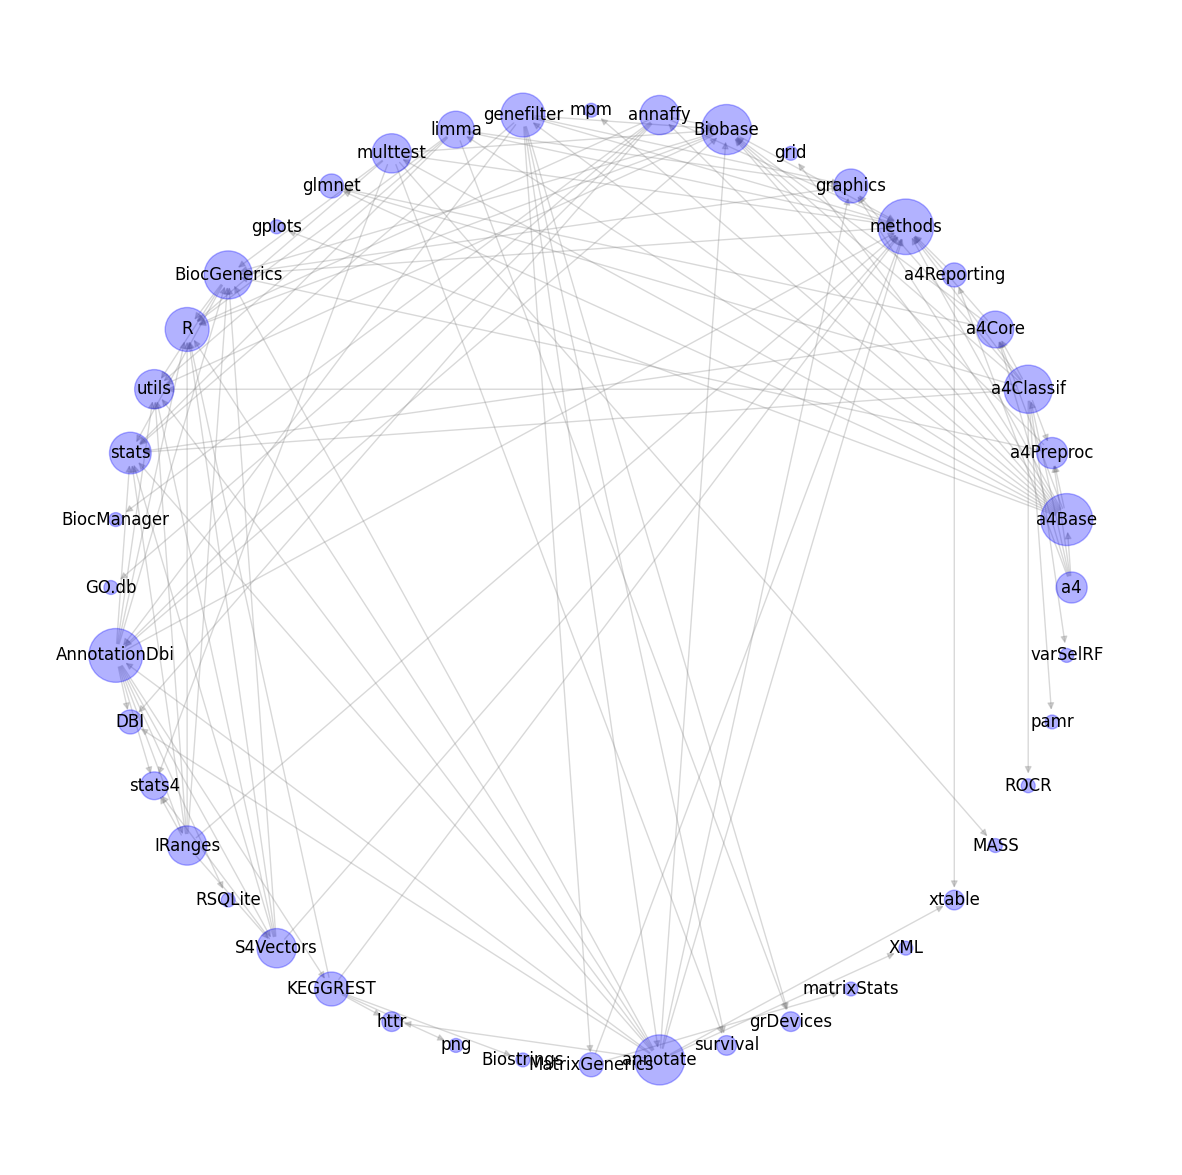

In [13]:
draw_network(a4_network, nx.circular_layout)

We can appreciate the difference, as we explained before if we use a combined datasource

In [ ]:
bioconductor_cran_pm = PackageManager(
    "Bioconductor scraper with cran scraper as auxyliary",
    data_sources=[BioconductorScraper(), CranScraper()]
)

a4_network_2 = bioconductor_cran_pm.dependency_network("a4", generate=True)

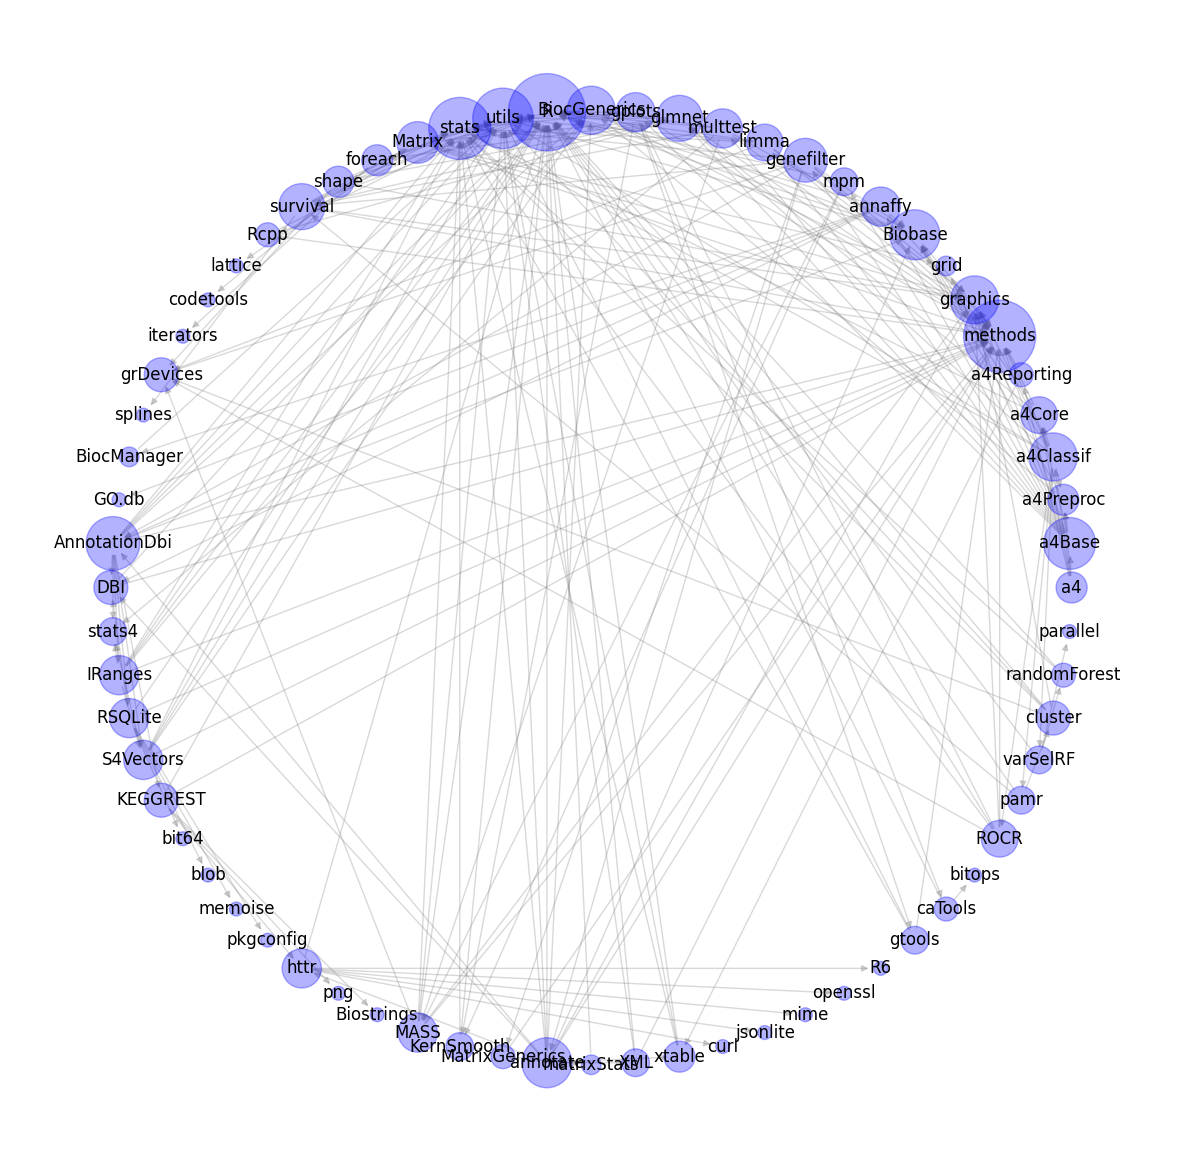

In [24]:
draw_network(a4_network_2, nx.circular_layout)